In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

In [5]:
df = pd.read_excel("slr06.xls")
df.head()

*** No CODEPAGE record, no encoding_override: will use 'ascii'


,X,Y
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4


In [6]:
raw_X = df["X"].values.reshape(-1, 1)
y = df["Y"].values

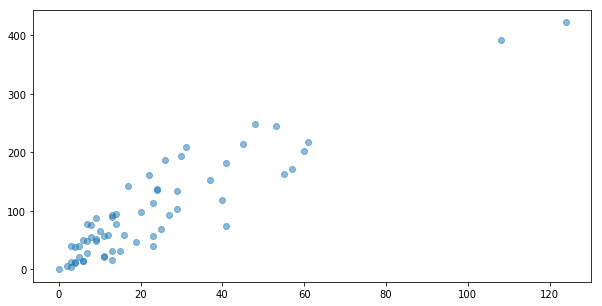

In [7]:
plt.figure(figsize=(10,5))
plt.plot(raw_X,y, 'o', alpha=0.5)

In [8]:
raw_X[:5], y[:5]

(array([[108],
        [ 19],
        [ 13],
        [124],
        [ 40]], dtype=int64), array([392.5,  46.2,  15.7, 422.2, 119.4]))

In [9]:

np.ones((len(raw_X),1))[:3]

array([[1.],
       [1.],
       [1.]])

In [10]:
X = np.concatenate( (np.ones((len(raw_X),1)), raw_X ), axis=1)
X[:5]

array([[  1., 108.],
       [  1.,  19.],
       [  1.,  13.],
       [  1., 124.],
       [  1.,  40.]])

In [59]:
w = np.random.normal((2,1)) # 정규분포에서 2개의 값 뽑아오는 것
# w = np.array([5,3])
w

array([3.19217361, 1.84998045])

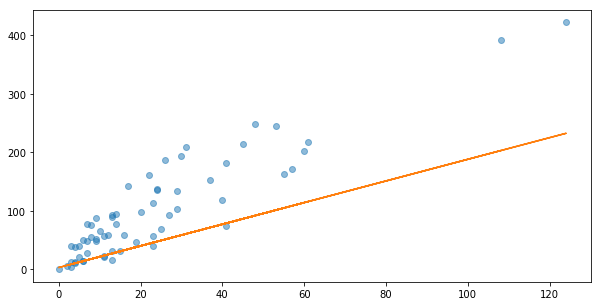

In [60]:
plt.figure(figsize=(10,5))
y_predict = np.dot(X, w)

plt.plot(raw_X,y,"o", alpha=0.5) #점으로
plt.plot(raw_X,y_predict)# 라인으로 

In [61]:
def hypothesis_function(X, theta):
    return X.dot(theta) # Xw

In [62]:
h = hypothesis_function(X,w)
h[:5] #vector

array([202.99006201,  38.34180212,  27.24191943, 232.58974918,
        77.19139153])

In [63]:
def cost_function(h, y):
    return (1/(2*len(y))) * np.sum((h-y)**2)

In [64]:
h = hypothesis_function(X,w)
cost_function(h, y)

2666.122433603586

## following the type of variables

In [77]:
X.shape

(63, 2)

In [78]:
w.shape

(2,)

In [79]:
Xw = np.dot(X, w)
Xw.shape # vector
(Xw-y).shape # vector

(63,)

In [80]:
(np.sum(Xw-y)) # scalr

-3315.171276144671

In [82]:
def gradient_descent(X, y, w, alpha, iterations):
    theta = w
    m = len(y)
    
    theta_list = [theta.tolist()]
    cost = cost_function(hypothesis_function(X, theta), y)
    cost_list = [cost]

    for i in range(iterations):
        t0 = theta[0] - (alpha / m) * np.sum(np.dot(X, theta) - y)
        t1 = theta[1] - (alpha / m) * np.sum((np.dot(X, theta) - y) * X[:,1])
        theta = np.array([t0, t1])
        
        if i % 10== 0:
            theta_list.append(theta.tolist())
            cost = cost_function(hypothesis_function(X, theta), y)
            cost_list.append(cost)


    return theta, theta_list, cost_list

In [24]:
iterations = 10000
alpha = 0.001

theta, theta_list, cost_list = gradient_descent(X, y, w, alpha, iterations)
#gradient에서는 theta만 나와도됨
cost = cost_function(hypothesis_function(X, theta), y)
#cost function에서 cost뽑기

print("theta:", theta)
print('cost:', cost_function(hypothesis_function(X, theta), y)) # cost function 값

theta: [19.87935314  3.41630955]
cost: 625.3743161336836


In [88]:
theta, theta_list, cost_list = gradient_descent(X, y, w, alpha, iterations)
print(theta)
# print(theta_list)
print(cost_list[-1]) #gradient descent에서 나온 cost list의 마지막 수렴값. 
                    #근데 결국에 이것도 cost funstion으로부터 나온 값


[19.88766017  3.41613018]
625.3738763314175


In [25]:

theta_list[:10]

[[1.8378620735797333, -0.48172233283299826],
 [1.9452452484312015, 4.068438015157025],
 [2.030576575241777, 3.801706960198557],
 [2.1211656670779426, 3.7997509268763845],
 [2.2112979327591993, 3.7978047575144602],
 [2.300975675986038, 3.7958684023702127],
 [2.3902011888417642, 3.7939418119521275],
 [2.4789767518510804, 3.792024937018269],
 [2.567304634038369, 3.7901177285750185],
 [2.6551870929856904, 3.7882201378758267]]

In [89]:
theta_list = np.array(theta_list)

In [90]:
cost_list[:5]

[2666.122433603586,
 703.8438263399753,
 695.6119510458741,
 694.9053093969139,
 694.2057767372481]

In [94]:
X.shape

(63, 2)

In [92]:
theta_list.shape

(1001, 2)

In [93]:
(theta_list.T).shape

(2, 1001)

In [96]:
np.dot(X, theta_list.transpose()).shape #예측한 y값

(63, 1001)

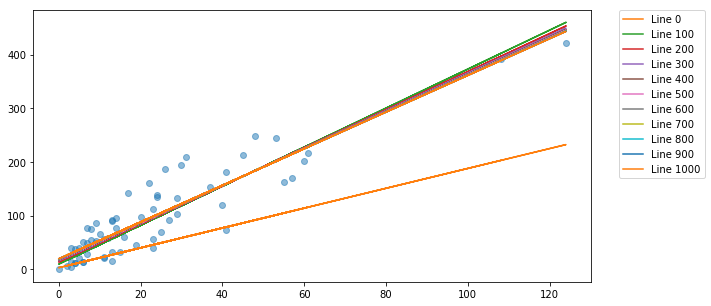

In [91]:
plt.figure(figsize=(10,5))

y_predict_step= np.dot(X, theta_list.transpose())

y_predict_step
plt.plot(raw_X,y,"o", alpha=0.5)
for i in range (0,len(cost_list),100):
    plt.plot(raw_X,y_predict_step[:,i], label='Line %d'%i)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

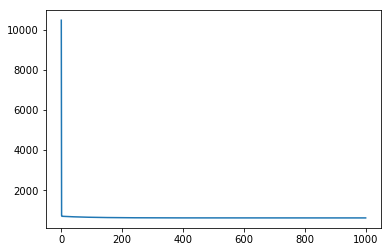

In [29]:

plt.plot(range(len(cost_list)), cost_list);

In [30]:
th0 = theta_list[:,0]
th1 = theta_list[:,1]
TH0, TH1 = np.meshgrid(th0, th1)

In [31]:

Js = np.array([cost_function(y, hypothesis_function(X, [th0, th1])) for th0, th1 in zip(np.ravel(TH0), np.ravel(TH1))])
Js = Js.reshape(TH0.shape)

<a list of 6 text.Text objects>

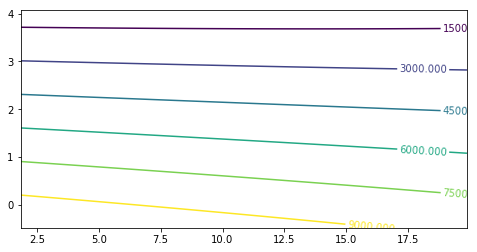

In [32]:
plt.figure(figsize=(8,4))
CS = plt.contour(TH0, TH1, Js)
plt.clabel(CS, inline=True, fontsize=10,inline_spacing=2)
#등고선 cost function을 그어준 것
# 위로 갈수록 최적 값

In [33]:
from mpl_toolkits.mplot3d import Axes3D

ms = np.linspace(theta[0] - 15 , theta[0] + 15, 100)
bs = np.linspace(theta[1] - 15 , theta[1] + 15, 100)

M, B = np.meshgrid(ms, bs)

zs = np.array([ cost_function(y, hypothesis_function(X, theta))
    for theta in zip(np.ravel(M), np.ravel(B))])
Z = zs.reshape(M.shape)

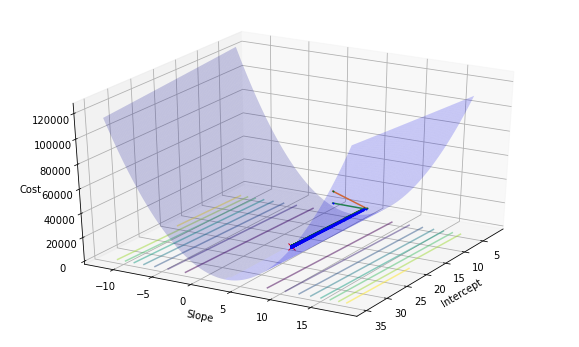

In [34]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(M, B, Z, rstride=1, cstride=1, color='b', alpha=0.2)
ax.contour(M, B, Z, 10, color='b', alpha=0.5, offset=0, stride=30)


ax.set_xlabel('Intercept')
ax.set_ylabel('Slope')
ax.set_zlabel('Cost') 
ax.view_init(elev=30., azim=30)
ax.plot([theta[0]], [theta[1]], [cost_list[-1]] , markerfacecolor='r', markeredgecolor='r', marker='x', markersize=7);

ax.plot(theta_list[:,0], theta_list[:,1], cost_list, markerfacecolor='g', markeredgecolor='g', marker='o', 
                markersize=1);
ax.plot(theta_list[:,0], theta_list[:,1], 0 , markerfacecolor='b', markeredgecolor='b', marker='.', markersize=2);